<a href="https://colab.research.google.com/github/JoeUzo/Analysis/blob/main/Multivariable_Regression_and_Valuation_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Setup and Context


### Introduction

Welcome to Boston, Massachusetts in the 1970s! In this scenario, the task is to build a model to estimate residential property prices based on various characteristics for a real estate development company.

### Upgrade plotly (only Google Colab Notebook)


In [ ]:
%pip install --upgrade plotly

###  Import Statements


In [ ]:
import pandas as pd
import numpy as np

import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

### Notebook Presentation

In [ ]:
pd.options.display.float_format = '{:,.2f}'.format

# Load the Data

In [ ]:
data = pd.read_csv('boston.csv', index_col=0)

### Understand the Boston House Price Dataset

---------------------------

This is a copy of [UCI ML housing dataset](https://archive.ics.uci.edu/ml/machine-learning-databases/housing/). This dataset was taken from the StatLib library which is maintained at Carnegie Mellon University. You can find the [original research paper here](https://deepblue.lib.umich.edu/bitstream/handle/2027.42/22636/0000186.pdf?sequence=1&isAllowed=y).


# Preliminary Data Exploration

In [ ]:
data.shape

(506, 14)

In [ ]:
data.head(10)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.01,18.00,2.31,0.00,0.54,6.58,65.20,4.09,1.00,296.00,15.30,396.90,4.98,24.00
1,0.03,0.00,7.07,0.00,0.47,6.42,78.90,4.97,2.00,242.00,17.80,396.90,9.14,21.60
2,0.03,0.00,7.07,0.00,0.47,7.18,61.10,4.97,2.00,242.00,17.80,392.83,4.03,34.70
3,0.03,0.00,2.18,0.00,0.46,7.00,45.80,6.06,3.00,222.00,18.70,394.63,2.94,33.40
4,0.07,0.00,2.18,0.00,0.46,7.15,54.20,6.06,3.00,222.00,18.70,396.90,5.33,36.20
5,0.03,0.00,2.18,0.00,0.46,6.43,58.70,6.06,3.00,222.00,18.70,394.12,5.21,28.70
6,0.09,12.50,7.87,0.00,0.52,6.01,66.60,5.56,5.00,311.00,15.20,395.60,12.43,22.90
7,0.14,12.50,7.87,0.00,0.52,6.17,96.10,5.95,5.00,311.00,15.20,396.90,19.15,27.10
8,0.21,12.50,7.87,0.00,0.52,5.63,100.00,6.08,5.00,311.00,15.20,386.63,29.93,16.50
9,0.17,12.50,7.87,0.00,0.52,6.00,85.90,6.59,5.00,311.00,15.20,386.71,17.10,18.90


## Data Cleaning - Check for Missing Values and Duplicates

In [ ]:
print(f'Any NaN value? {data.isna().values.any()}')

Any NaN value? False


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  PRICE    506 non-null    float64
dtypes: float64(14)
memory usage: 59.3 KB


## Descriptive Statistics

In [ ]:
print(f'The average students per teacher are {data.PTRATIO.mean():.4}')

The average students per teacher are 18.46


In [ ]:
print(f'The average price of a home is {data.PRICE.mean() * 1000:.7}')

The average price of a home is 22532.81


In [ ]:
data.CHAS.describe()

count   506.00
mean      0.07
std       0.25
min       0.00
25%       0.00
50%       0.00
75%       0.00
max       1.00
Name: CHAS, dtype: float64

In [ ]:
print(f'The maximum number of rooom is {data.RM.max()} and the minimum nuber of rooms is {data.RM.min()}')

The maximum number of rooom is 8.78 and the minimum nuber of rooms is 3.561


## Visualise the Features

#### House Prices 💰

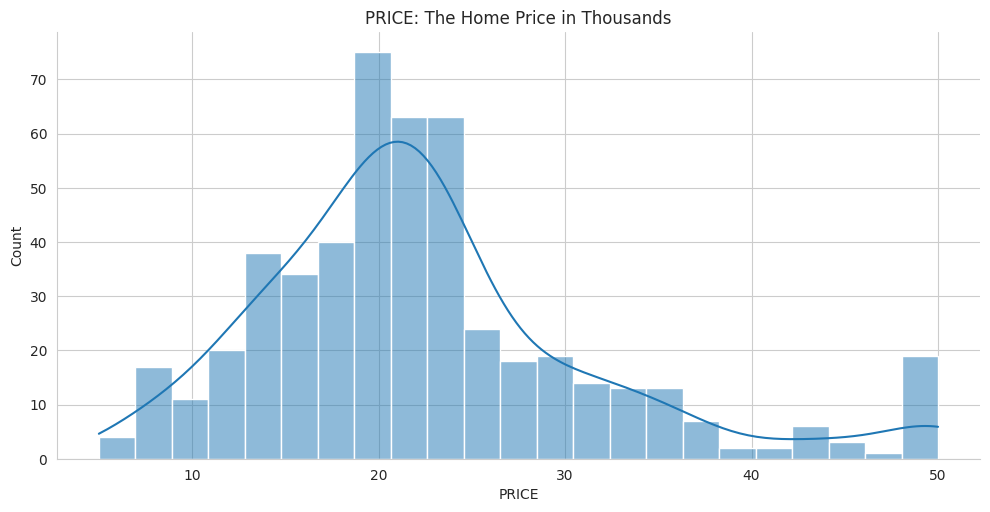

In [ ]:
with sns.axes_style('whitegrid'):
  sns.displot(data=data, x="PRICE", aspect=2, kde=True)
plt.title('PRICE: The Home Price in Thousands')
plt.show()

#### Distance to Employment - Length of Commute 🚗

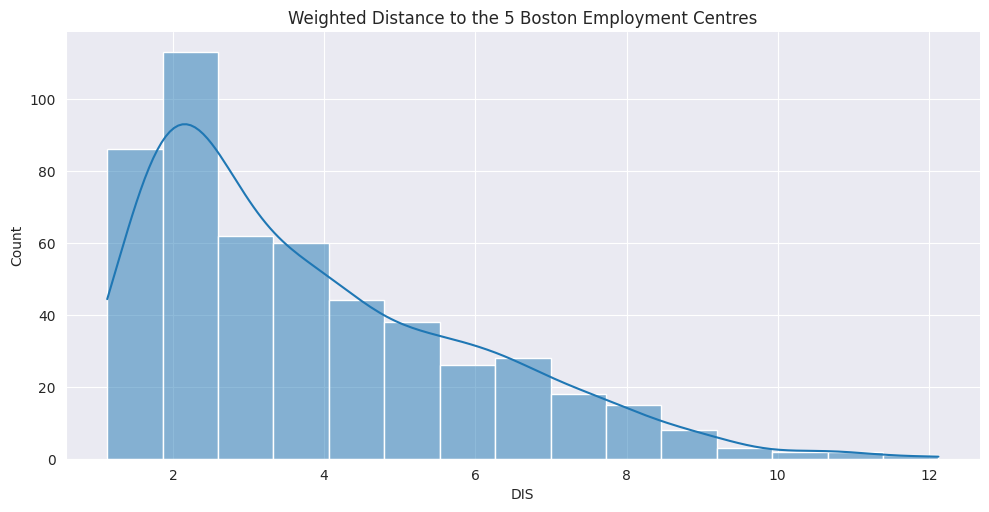

In [ ]:
with sns.axes_style("darkgrid"):
  sns.displot(data=data, x="DIS", aspect=2, kde=True)
plt.title('Weighted Distance to the 5 Boston Employment Centres')
plt.show()

#### Number of Rooms

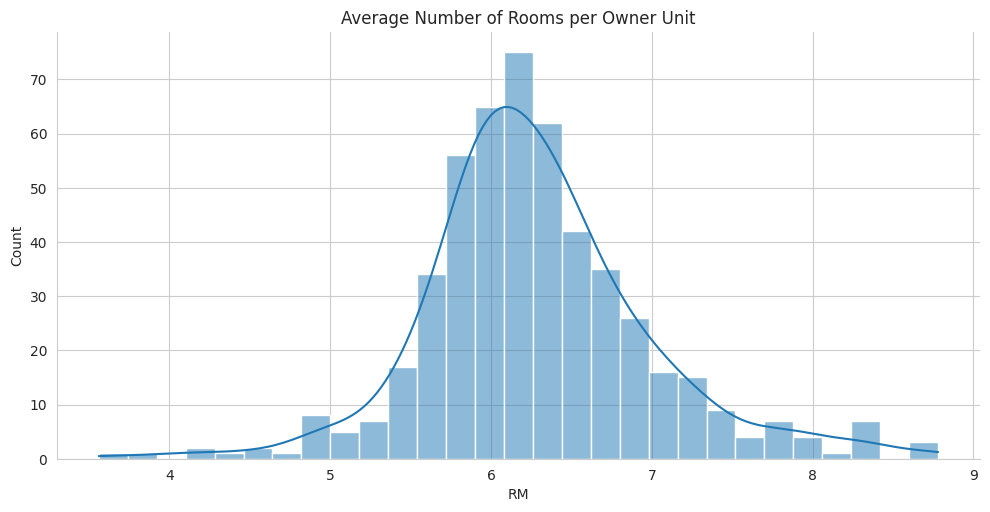

In [ ]:
with sns.axes_style('whitegrid'):
  sns.displot(data=data, x="RM", aspect=2, kde=True)
plt.title('Average Number of Rooms per Owner Unit')
plt.show()

#### Access to Highways 🛣

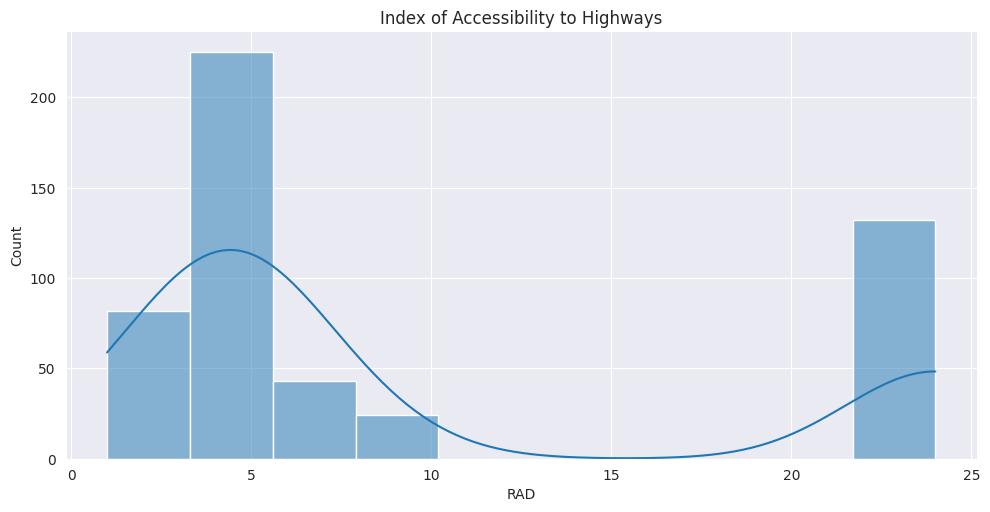

In [ ]:
with sns.axes_style("darkgrid"):
  sns.displot(data=data, x="RAD", aspect=2, kde=True)
plt.title('Index of Accessibility to Highways')
plt.show()

#### Next to the River? ⛵️


In [ ]:
chas_data = data[['CHAS']]
chas_data['status'] = np.where(chas_data.CHAS == 0, 'No', 'Yes')
chas_data = chas_data.status.value_counts()
chas_data

<ipython-input-17-980cc97caf88>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chas_data['status'] = np.where(chas_data.CHAS == 0, 'No', 'Yes')


No     471
Yes     35
Name: status, dtype: int64

In [ ]:
chas_bar = px.bar(x=chas_data.index,
                  y=chas_data.values,
                  color=chas_data.values,
                  title='Next to Charles River?')

chas_bar.update_layout(xaxis_title='Property Located next to the River',
                       yaxis_title='Number of Homes',
                       coloraxis_showscale=False)

chas_bar.show()

# Understand the Relationships in the Data

###Pair Plot

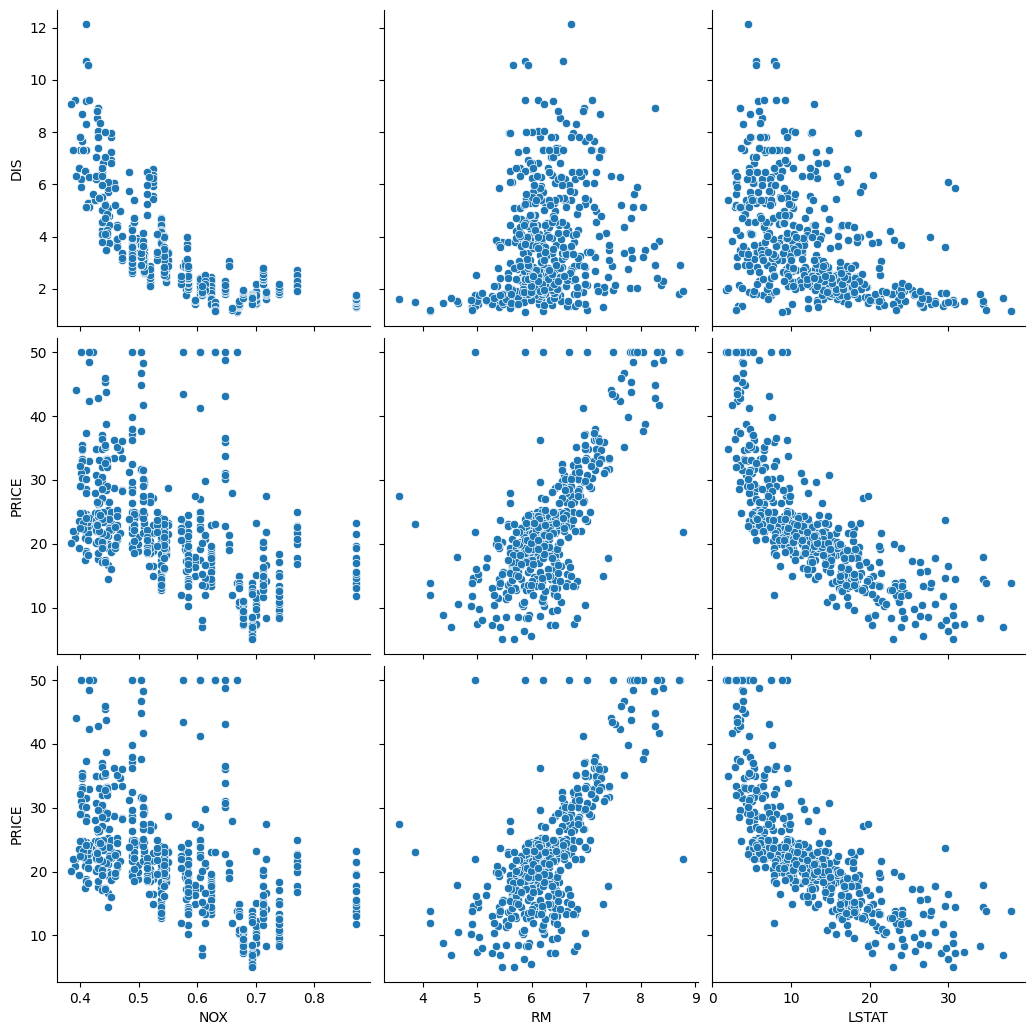

In [ ]:
sns.pairplot(data,
             x_vars=['NOX', 'RM', 'LSTAT'],
             y_vars=['DIS', 'PRICE', 'PRICE'],
             height=3.5)

plt.show()

#### Distance from Employment vs. Pollution

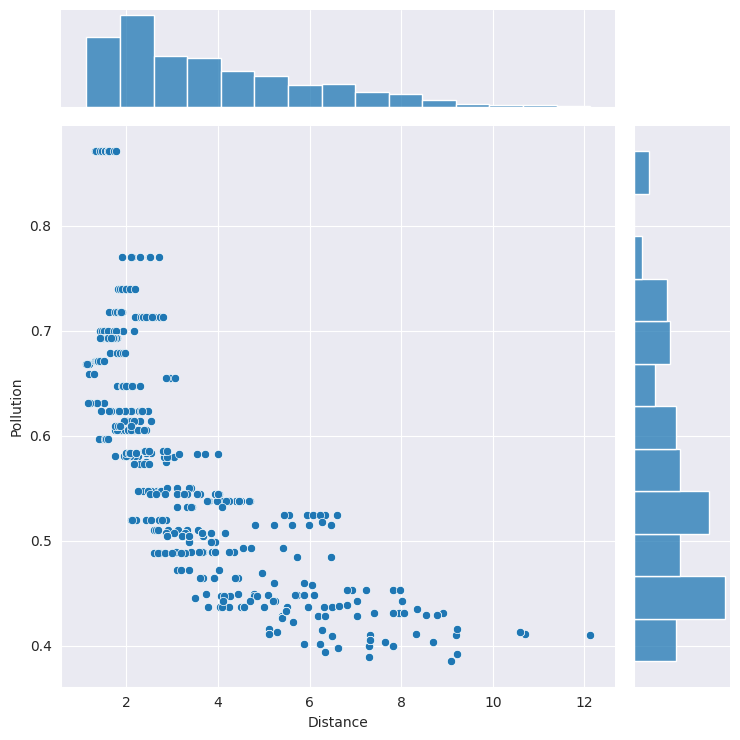

In [ ]:
with sns.axes_style("darkgrid"):
  sns.jointplot(data,
                x='DIS',
                y='NOX',
                height=7.5)
plt.xlabel('Distance')
plt.ylabel('Pollution')
plt.show()

#### Proportion of Non-Retail Industry versus Pollution


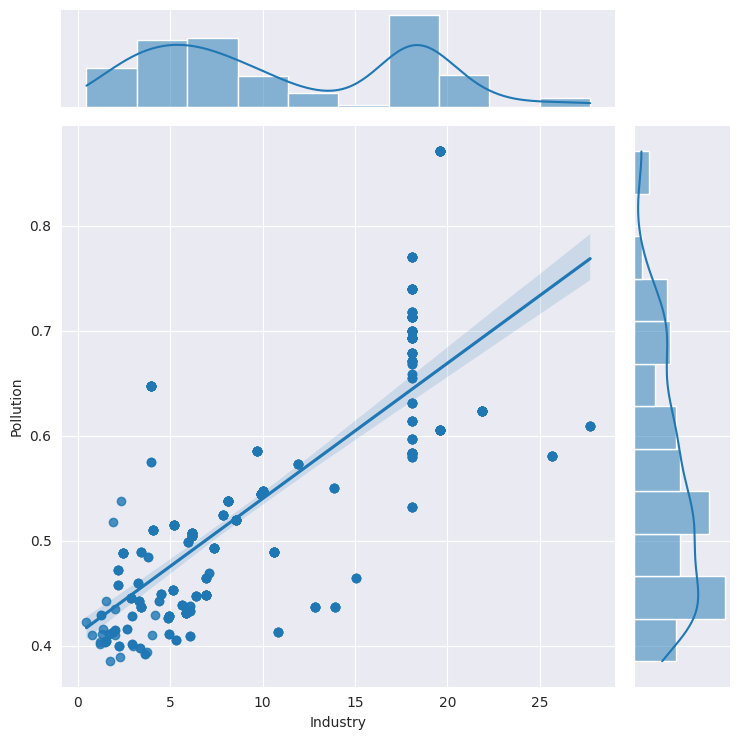

In [ ]:
with sns.axes_style("darkgrid"):
  sns.jointplot(data,
                x='INDUS',
                y='NOX',
                height=7.5,
                kind="reg")
plt.xlabel('Industry')
plt.ylabel('Pollution')
plt.show()

#### % of Lower Income Population vs Average Number of Rooms

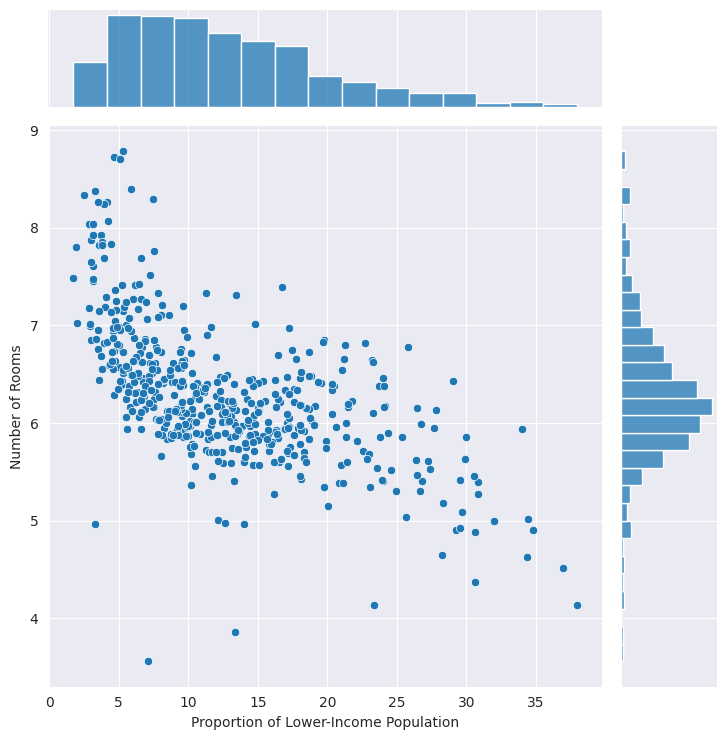

In [ ]:
with sns.axes_style("darkgrid"):
  sns.jointplot(data,
                x='LSTAT',
                y='RM',
                height=7.5)
plt.xlabel('Proportion of Lower-Income Population')
plt.ylabel('Number of Rooms')
plt.show()

#### % of Lower Income Population versus Home Price

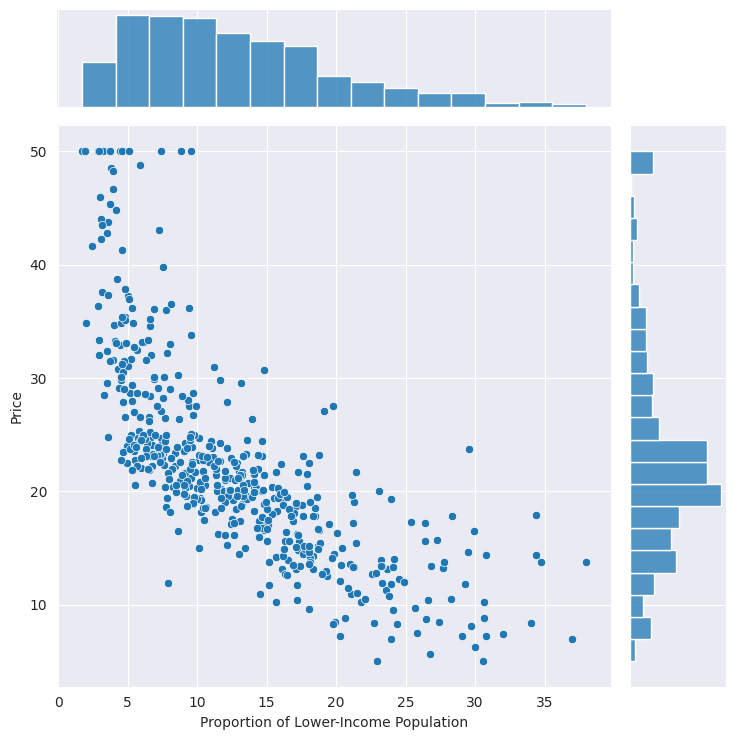

In [ ]:
with sns.axes_style("darkgrid"):
  sns.jointplot(data,
                x='LSTAT',
                y='PRICE',
                height=7.5)
plt.xlabel('Proportion of Lower-Income Population')
plt.ylabel('Price')
plt.show()

#### Number of Rooms versus Home Value

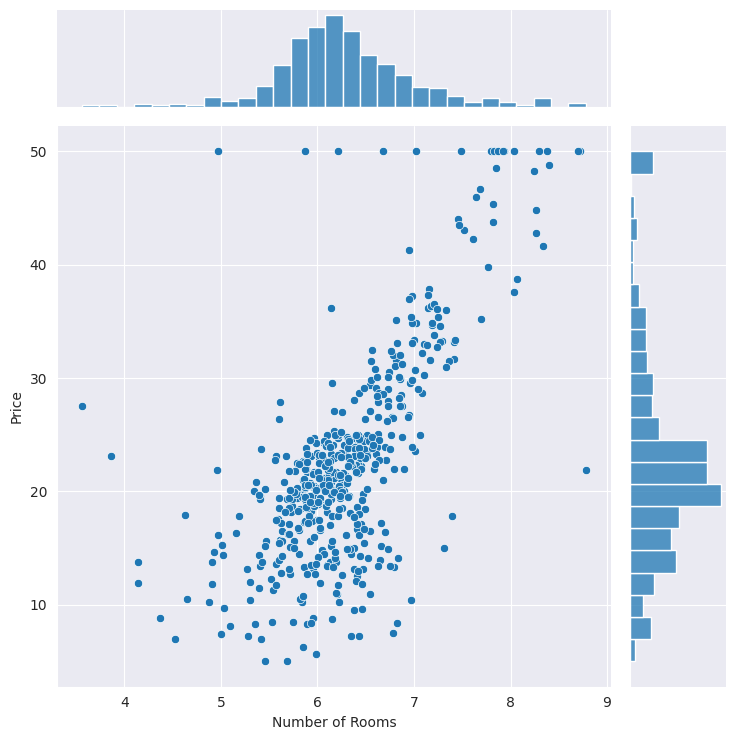

In [ ]:
with sns.axes_style("darkgrid"):
  sns.jointplot(data,
                x='RM',
                y='PRICE',
                height=7.5)
plt.xlabel('Number of Rooms')
plt.ylabel('Price')
plt.show()

# Split Training & Test Dataset


In [ ]:
features = data.drop('PRICE', axis=1)
target = data.PRICE

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=10)

In [ ]:
# % of training set
train_pct = 100*len(X_train)/len(target)
print(f'Training data is {train_pct:.3}% of the total data.')

# % of test data set
test_pct = 100*X_test.shape[0]/target.shape[0]
print(f'Test data makes up the remaining {test_pct:0.3}%.')

Training data is 79.8% of the total data.
Test data makes up the remaining 20.2%.


# Multivariable Regression

In [ ]:
regression = LinearRegression()
regression.fit(X_train, y_train)
print(regression.intercept_)

# R-squared
rsquared = regression.score(X_train, y_train)

36.53305138282431


### Coefficients of the Model

In [ ]:
regression.coef_

array([-1.28180656e-01,  6.31981786e-02, -7.57627602e-03,  1.97451452e+00,
       -1.62719890e+01,  3.10845625e+00,  1.62922153e-02, -1.48301360e+00,
        3.03988206e-01, -1.20820710e-02, -8.20305699e-01,  1.14189890e-02,
       -5.81626431e-01])

In [ ]:
reg_coef = pd.DataFrame(data=regression.coef_, index=X_train.columns, columns=['Coef'])
reg_coef

,Coef
CRIM,-0.13
ZN,0.06
INDUS,-0.01
CHAS,1.97
NOX,-16.27
RM,3.11
AGE,0.02
DIS,-1.48
RAD,0.30
TAX,-0.01


In [ ]:
# Premium for having an extra room
premium = reg_coef.loc['RM'].values[0] * 1000  # i.e., ~3.11 * 1000
print(f'The price premium for having an extra room is ${premium:.5}')

The price premium for having an extra room is $3108.5


### Analyse the Estimated Values & Regression Residuals


In [ ]:
predicted_values = regression.predict(X_train)
residuals = (y_train - predicted_values)

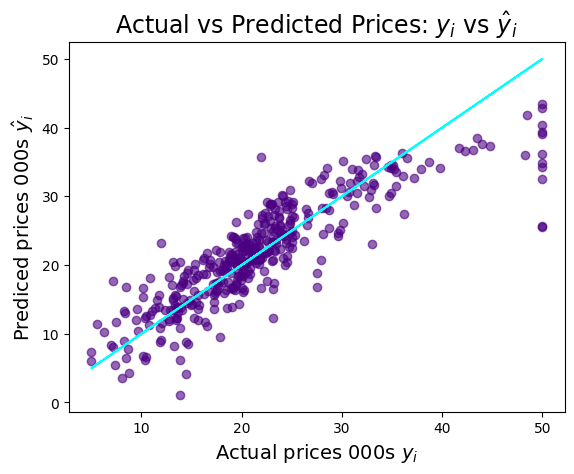

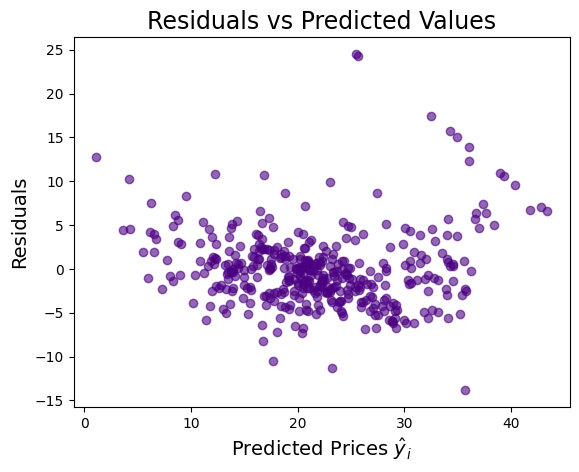

In [ ]:
# Original Regression of Actual vs. Predicted Prices
plt.figure(dpi=100)
plt.scatter(x=y_train, y=predicted_values, c='indigo', alpha=0.6)
plt.plot(y_train, y_train, color='cyan')
plt.title(f'Actual vs Predicted Prices: $y _i$ vs $\hat y_i$', fontsize=17)
plt.xlabel('Actual prices 000s $y _i$', fontsize=14)
plt.ylabel('Prediced prices 000s $\hat y _i$', fontsize=14)
plt.show()

# Residuals vs Predicted values
plt.figure(dpi=100)
plt.scatter(x=predicted_values, y=residuals, c='indigo', alpha=0.6)
plt.title('Residuals vs Predicted Values', fontsize=17)
plt.xlabel('Predicted Prices $\hat y _i$', fontsize=14)
plt.ylabel('Residuals', fontsize=14)
plt.show()

In [ ]:
resid_mean = round(residuals.mean(), 2)
resid_skew = round(residuals.skew(), 2)


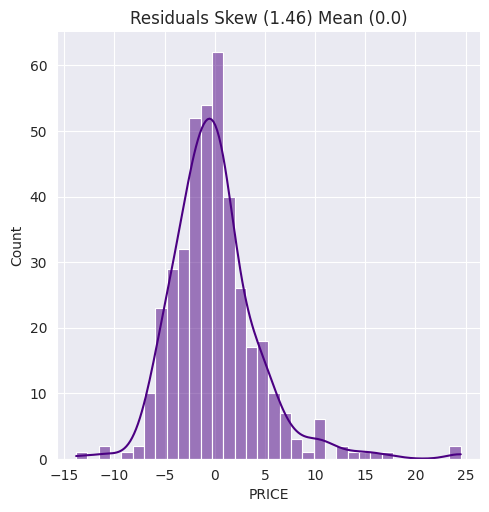

In [ ]:
with sns.axes_style('darkgrid'):
  sns.displot(residuals, kde=True, color='indigo')
plt.title(f'Residuals Skew ({resid_skew}) Mean ({resid_mean})')
plt.show()

### Data Transformations for a Better Fit


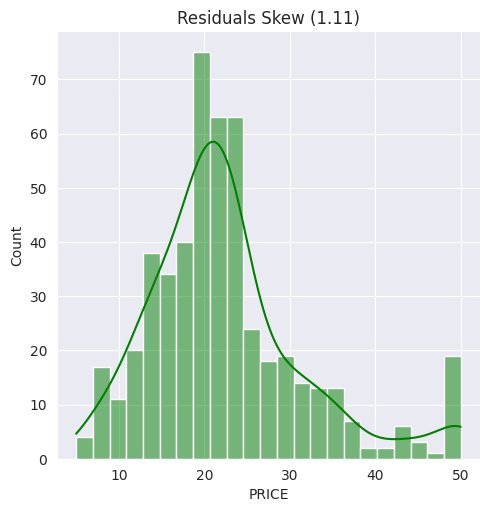

In [ ]:
trg_skew = data['PRICE'].skew()
with sns.axes_style('darkgrid'):
  sns.displot(data['PRICE'], kde=True, color='green')
plt.title(f'Residuals Skew ({trg_skew:.3})')
plt.show()

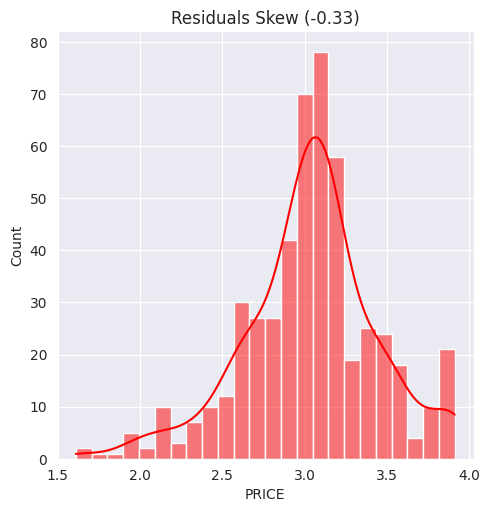

In [ ]:
log_val = np.log(data['PRICE'])
log_skew = log_val.skew()
with sns.axes_style('darkgrid'):
  sns.displot(log_val, kde=True, color='red')
plt.title(f'Residuals Skew ({log_skew:.3})')
plt.show()

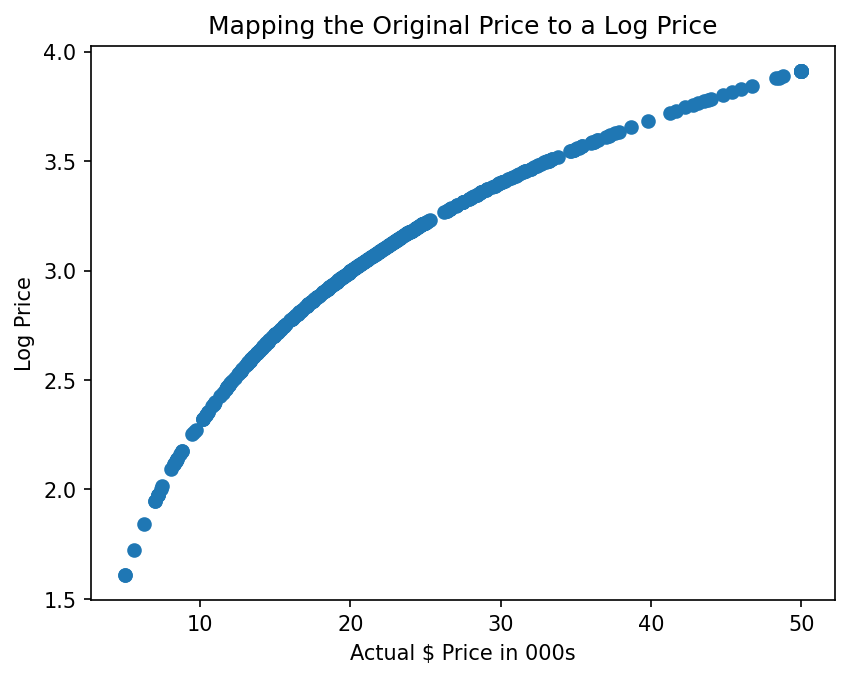

In [ ]:
plt.figure(dpi=150)
plt.scatter(data.PRICE, np.log(data.PRICE))

plt.title('Mapping the Original Price to a Log Price')
plt.ylabel('Log Price')
plt.xlabel('Actual $ Price in 000s')
plt.show()

## Regression using Log Prices


In [ ]:
features = data.drop('PRICE', axis=1)
target = log_val

In [ ]:
X_train, X_test, log_y_train, log_y_test = train_test_split(features, target, test_size=0.2, random_state=10)

In [ ]:
log_regr = LinearRegression()
log_regr.fit(X_train, log_y_train)
print(log_regr.intercept_)

# R-squared
log_rsquared = log_regr.score(X_train, log_y_train)

log_predictions = log_regr.predict(X_train)
log_residuals = (log_y_train - log_predictions)

print(f'Training data r-squared: {log_rsquared:.2}')

4.0599438717751966
Training data r-squared: 0.79


## Evaluating Coefficients with Log Prices

In [ ]:
df_coef = pd.DataFrame(data=log_regr.coef_, index=X_train.columns, columns=['coef'])
df_coef

,coef
CRIM,-0.01
ZN,0.00
INDUS,0.00
CHAS,0.08
NOX,-0.70
RM,0.07
AGE,0.00
DIS,-0.05
RAD,0.01
TAX,-0.00


## Regression with Log Prices & Residual Plots

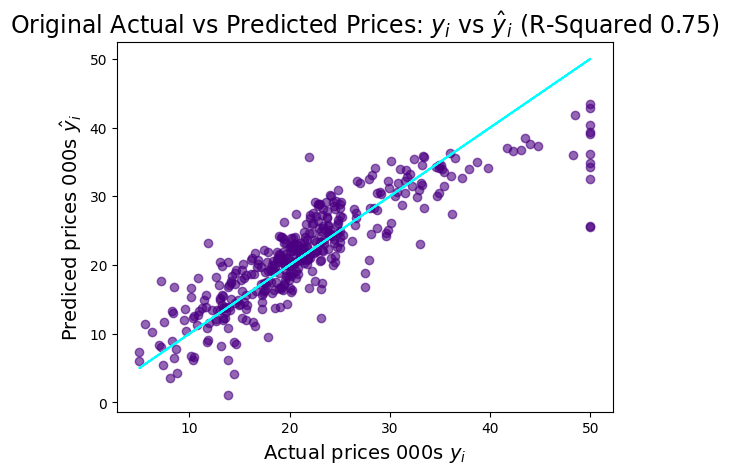

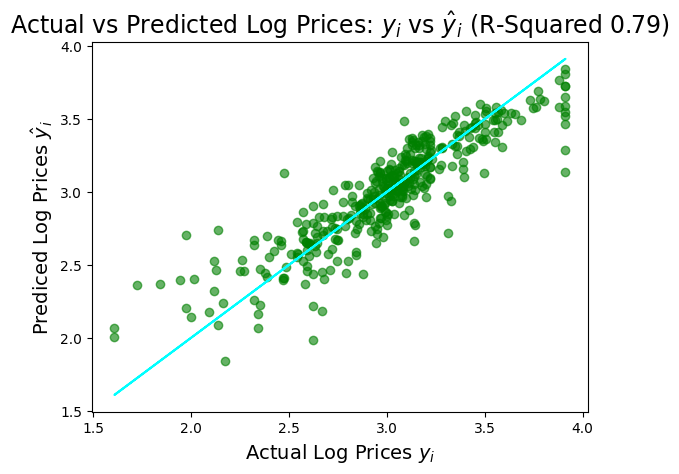

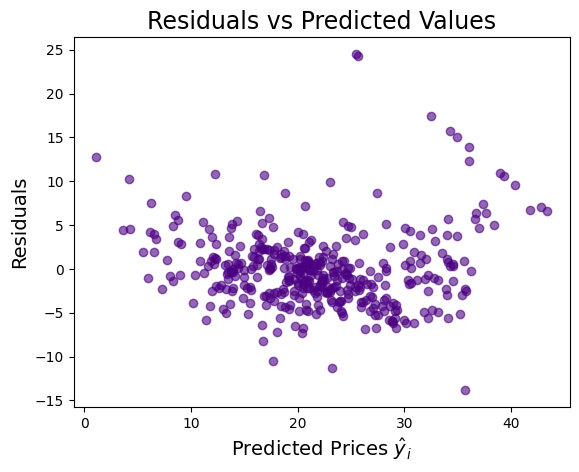

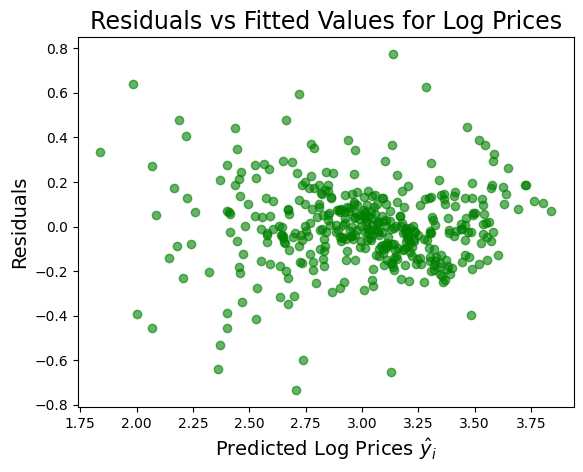

In [ ]:
# Original Regression of Actual vs. Predicted Prices
plt.figure(dpi=100)
plt.scatter(x=y_train, y=predicted_values, c='indigo', alpha=0.6)
plt.plot(y_train, y_train, color='cyan')
plt.title(f'Original Actual vs Predicted Prices: $y _i$ vs $\hat y_i$ (R-Squared {rsquared:.3})', fontsize=17)
plt.xlabel('Actual prices 000s $y _i$', fontsize=14)
plt.ylabel('Prediced prices 000s $\hat y _i$', fontsize=14)
plt.show()

# Graph of Actual vs. Predicted Log Prices
plt.figure(dpi=100)
plt.scatter(x=log_y_train, y=log_predictions, c='green', alpha=0.6)
plt.plot(log_y_train, log_y_train, color='cyan')
plt.title(f'Actual vs Predicted Log Prices: $y _i$ vs $\hat y_i$ (R-Squared {log_rsquared:.2})', fontsize=17)
plt.xlabel('Actual Log Prices $y _i$', fontsize=14)
plt.ylabel('Prediced Log Prices $\hat y _i$', fontsize=14)
plt.show()


# Residuals vs Predicted values
plt.figure(dpi=100)
plt.scatter(x=predicted_values, y=residuals, c='indigo', alpha=0.6)
plt.title('Residuals vs Predicted Values', fontsize=17)
plt.xlabel('Predicted Prices $\hat y _i$', fontsize=14)
plt.ylabel('Residuals', fontsize=14)
plt.show()

# Residuals vs Predicted values (Log prices)
plt.figure(dpi=100)
plt.scatter(x=log_predictions, y=log_residuals, c='green', alpha=0.6)
plt.title('Residuals vs Fitted Values for Log Prices', fontsize=17)
plt.xlabel('Predicted Log Prices $\hat y _i$', fontsize=14)
plt.ylabel('Residuals', fontsize=14)
plt.show()



**Challenge**:

Calculate the mean and the skew for the residuals using log prices. Are the mean and skew closer to 0 for the regression using log prices?

In [ ]:
log_resid_mean = round(log_residuals.mean(), 2)
log_resid_mean

-0.0

In [ ]:
log_resid_skew = round(log_residuals.skew(), 2)
log_resid_skew

0.09

# Compare Out of Sample Performance

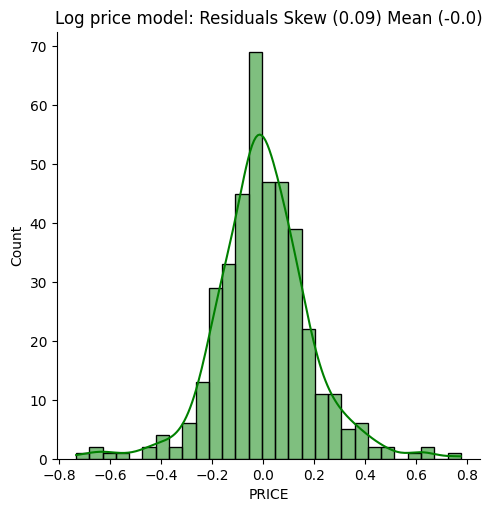

In [ ]:
sns.displot(log_residuals, kde=True, color='green')
plt.title(f'Log price model: Residuals Skew ({log_resid_skew}) Mean ({log_resid_mean})')
plt.show()

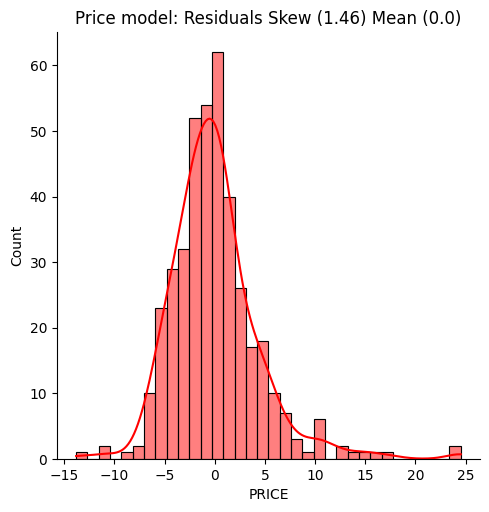

In [ ]:
sns.displot(residuals, kde=True, color='red')
plt.title(f'Price model: Residuals Skew ({resid_skew}) Mean ({resid_mean})')
plt.show()

# Predict a Property's Value using the Regression Coefficients


In [ ]:
# Starting Point: Average Values in the Dataset
features = data.drop(['PRICE'], axis=1)
average_vals = features.mean().values
property_stats = pd.DataFrame(data=average_vals.reshape(1, len(features.columns)),
                              columns=features.columns)
property_stats

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,3.61,11.36,11.14,0.07,0.55,6.28,68.57,3.80,9.55,408.24,18.46,356.67,12.65


In [ ]:
log_estimate = log_regr.predict(property_stats)[0]
print(f'The log price estimate is ${log_estimate:.3}')

The log price estimate is $3.03


In [ ]:
dollar_est = np.exp(log_estimate) * 1000
print(f'The property is estimated to be worth ${dollar_est:.7}')

The property is estimated to be worth $20703.18


In [ ]:
# Define Property Characteristics
next_to_river = True
nr_rooms = 8
students_per_classroom = 20
distance_to_town = 5
pollution = data.NOX.quantile(q=0.75) # high
amount_of_poverty =  data.LSTAT.quantile(q=0.25) # low

In [ ]:
# Solution:
property_stats['RM'] = nr_rooms
property_stats['PTRATIO'] = students_per_classroom
property_stats['DIS'] = distance_to_town
property_stats['NOX'] = pollution
property_stats['LSTAT'] = amount_of_poverty

if next_to_river:
  property_stats['CHAS'] = 1
else:
  property_stats['CHAS'] = 0


In [ ]:
log_estimate = log_regr.predict(property_stats)[0]
print(f'The log price estimate is ${log_estimate:.3}')

dollar_est = np.exp(log_estimate) * 1000
print(f'The property is estimated to be worth ${dollar_est:.7}')

The log price estimate is $3.25
The property is estimated to be worth $25792.03
